# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# from sklearnex import patch_sklearn
# patch_sklearn()

scikit-learn version:  0.21.3


In [2]:
# helper function to load MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1237007
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 63 69 65 53 67 56 60 51 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [63 63 69 65 53 67 56 60 51 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


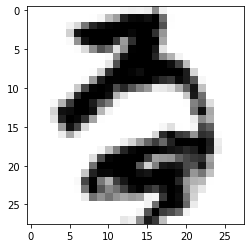

LABEL: 4
INPUT:


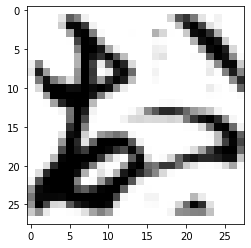

LABEL: 0
INPUT:


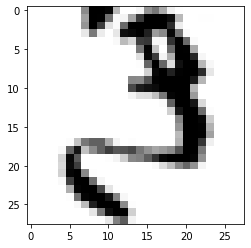

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

## TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=200, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

mlp_arch_CV = GridSearchCV(mlp, parameters, cv=5)

mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_arch_CV.best_params_)

print("Score with best parameters:")
print(mlp_arch_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_arch_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conver

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.7316666666666667

All scores on the grid:
[0.66666667 0.69666667 0.73166667 0.675      0.55166667]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)
best_hidden_layer_sizes = mlp_arch_CV.best_params_['hidden_layer_sizes']
mlp = MLPClassifier(best_hidden_layer_sizes, 
                    max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf)

mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_batch_CV.best_params_)

print("Score with best parameters:")
print(mlp_batch_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_batch_CV.cv_results_['mean_test_score'])

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conver

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}
Score with best parameters:
0.75

All scores on the grid:
[0.08       0.75       0.72833333]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

### TODO 3:

Plot the train and test accuracies as a function of the numbero of neurons in your neural network. Print also the computation time for the various configuration you try.

Training MLP of size (10,) ...


C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done, training time: 0.35 sec

Training MLP of size (20,) ...


C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done, training time: 0.39 sec

Training MLP of size (40,) ...


C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done, training time: 0.56 sec

Training MLP of size (20, 20) ...


C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done, training time: 0.43 sec

Training MLP of size (30, 30, 20) ...


C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done, training time: 0.59 sec



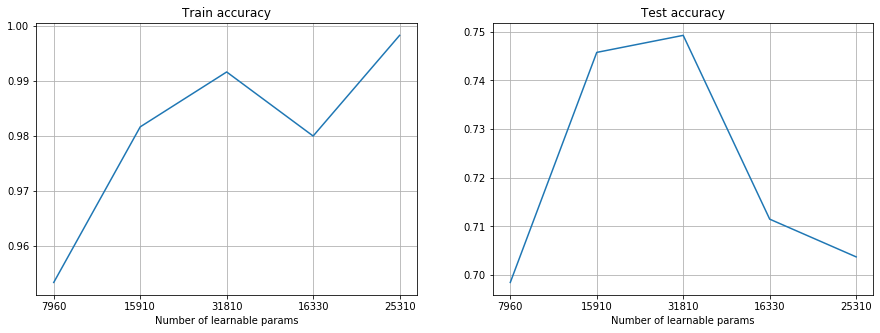

In [10]:
import time
from functools import reduce
# def count(iterable):
#     return reduce(lambda x,y: x*y, iterable)

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size,
                        max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=.01)
    mlp.fit(X_train, y_train)
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conver

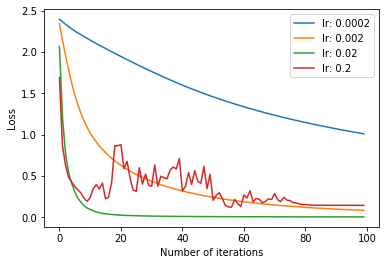

RESULTS FOR NN

Best parameters set found:
0.02
Score with best parameters:
0.76525


In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
#lr_list = [10**exp for exp in range(-3,1)]
scores = {}

best_hidden_layer_sizes = mlp_arch_CV.best_params_['hidden_layer_sizes']
best_batch_size = mlp_batch_CV.best_params_['batch_size']

for lr in lr_list: 
    mlp = MLPClassifier(best_hidden_layer_sizes, batch_size = best_batch_size,
                        max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID, learning_rate_init=lr, n_iter_no_change=200)
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_test, y_test)
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(max(scores.items(), key=operator.itemgetter(1))[0])

print("Score with best parameters:")
print(max(scores.values()))


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case.

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
No handles with labels found to put in legend.



RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.248000


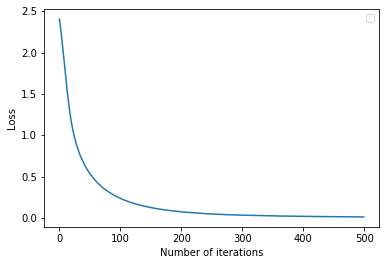

In [12]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=(40,), max_iter=500, alpha=1e-4, batch_size=480,
                    solver='sgd', verbose=False, tol=1e-4, random_state=ID,
                    learning_rate_init=.01, n_iter_no_change=5000)
mlp.fit(X_train, y_train)
training_error = 1. - mlp.score(X_train,y_train)
test_error = 1. - mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_)
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [373 407 391 428 412 424 403 351 390 421]


## TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [ (40,) ]}

mlp_large = MLPClassifier(max_iter=100, alpha=1e-4, hidden_layer_sizes = (40,),
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.01, verbose=True)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1. - mlp_large.score(X_train,y_train)
test_error = 1. - mlp_large.score(X_test,y_test)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 2.14266735
Iteration 2, loss = 1.51350587
Iteration 3, loss = 1.12918023
Iteration 4, loss = 0.94114462
Iteration 5, loss = 0.82673938
Iteration 6, loss = 0.74933779
Iteration 7, loss = 0.69200063
Iteration 8, loss = 0.64779316
Iteration 9, loss = 0.61184241
Iteration 10, loss = 0.58057975
Iteration 11, loss = 0.55405990
Iteration 12, loss = 0.53110954
Iteration 13, loss = 0.50966604
Iteration 14, loss = 0.49366454
Iteration 15, loss = 0.47414323
Iteration 16, loss = 0.45776128
Iteration 17, loss = 0.44294163
Iteration 18, loss = 0.42953290
Iteration 19, loss = 0.41659606
Iteration 20, loss = 0.40319847
Iteration 21, loss = 0.39299637
Iteration 22, loss = 0.38161172
Iteration 23, loss = 0.37138473
Iteration 24, loss = 0.36152693
Iteration 25, loss = 0.35311397
Iteration 26, loss = 0.34231147
Iteration 27, loss = 0.33439405
Iteration 28, loss = 0.32638349
Iteration 29, loss = 0.31854382
Iteration 30, loss = 0.31099924
Iteration 31, loss = 0.30155978
Iteration 32, los

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NN training error: 0.007250
NN test error: 0.154625


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


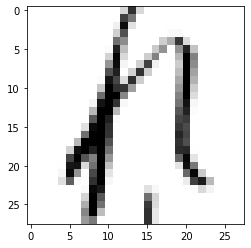

LABEL: 8
NN prediction for m=600:  1
NN prediction for m=4000:  8


In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)
i = 0
found = False
while ((not found) and (i<len(y_test))):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        plot_input(X_test, y_test, i)
        print("NN prediction for m=600: ", NN_prediction[i])
        print("NN prediction for m=4000: ",large_NN_prediction[i])
        found = True
    else:
        i += 1
        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points.



Weights with 600 data points:


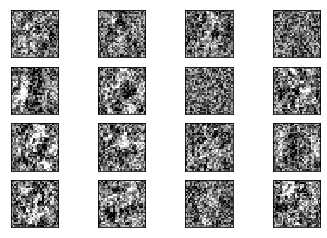

Weights with 4000 data points:


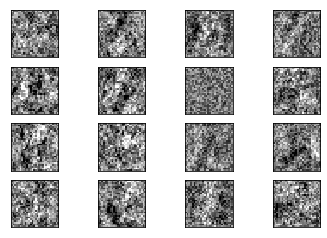

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights

##### [ANSWER TO QUESTION 5]

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
SVM = SVC(kernel='rbf', C=10, gamma=0.01)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1. - SVM.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - SVM.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.0796


In [18]:
from sklearn import linear_model

#lr = linear_model.LogisticRegression(penalty='l2', C=9999999, solver='newton-cg') # regularization not included
#lr.fit(X_train, y_train)
#
#print ('RESULTS FOR LOGISTIC REGRESSION WITHOUT REGULARIZATION')
#
#training_error = 1. - lr.score(X_train,y_train)
#test_error = 1. - lr.score(X_test,y_test)

#print ("Training error (no reg): %f" % training_error)
#print ("Test error (no reg): %f" % test_error)


regL2 = linear_model.LogisticRegression(penalty='l2', C=1, solver='newton-cg')
regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1. - regL2.score(X_train,y_train)
test_error = 1. - regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)

C:\Users\Anay Deshpande\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.066000
Test error (reg): 0.238400


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one would you prefer? 

###### [ANSWER TO QUESTION 6]